In [1]:
#Gradient descent illustration.  Version 1.0
#Coded by Justin Mackie 
#December 14, 2018
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D  #for 3D plots
import numpy as np
import pandas as pd

In [2]:
#Figures sourced from Jahnavi Mahanta's article: https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html

#THIS CODE IS WRITTEN FOR SIMPLICITY AND TRANSPARENCY, NOT RAW SPEED

#import house price data as Pandas Dataframe
data = pd.read_csv('House_Price.csv')
['House_Size', 'House_Price']

for c in ['House_Size', 'House_Price']:
    data[c]=data[c].str.replace(',','').astype('float')
    

In [3]:
#Standardize features using pd.Series
def standardize(ser):
    data['max']=ser.max()
    data['min']=ser.min()
    data['std']=(ser - data['min'])/(data['max']-data['min'])
    return data['std']

def standardize_sigma(ser):
    data['stdev']=ser.std()
    data['std']=ser/data['stdev']
    return data['std']

for c in ['House_Size', 'House_Price']:
    data['Std_'+c]=standardize_sigma(data[c])
    data=data.drop(['std'], axis=1)
    print('Standard Deviation -',c,'-', data['stdev'].iloc[0])
data

Standard Deviation - House_Size - 417.86494362546273
Standard Deviation - House_Price - 56949.19763360245


,House_Size,House_Price,stdev,Std_House_Size,Std_House_Price
0,1100.0,199000.0,56949.197634,2.632429,3.494342
1,1400.0,245000.0,56949.197634,3.350365,4.302080
2,1425.0,319000.0,56949.197634,3.410193,5.601484
3,1550.0,240000.0,56949.197634,3.709332,4.214282
4,1600.0,312000.0,56949.197634,3.828988,5.478567
5,1700.0,279000.0,56949.197634,4.068300,4.899103
6,1700.0,310000.0,56949.197634,4.068300,5.443448
7,1875.0,308000.0,56949.197634,4.487096,5.408329
8,2350.0,405000.0,56949.197634,5.623827,7.111602
9,2450.0,324000.0,56949.197634,5.863138,5.689281


###  Standard Deviation House Price -  56949.19763360245  ###

 *************Gradient Descent************
Last Iteration: 100 |  SSE: 54.4447
Gradient for a: 10.435 | Gradient for b: -2.407
Updated a: 23.508 | Updated b: -4.217

            Max Iterations = 100 :
******************************************


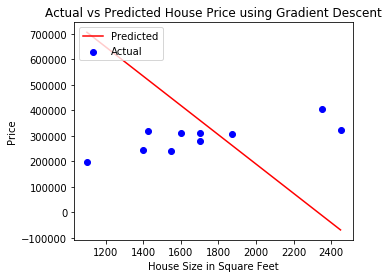


 *************Gradient Descent************
Last Iteration: 400 |  SSE: 3.0084
Gradient for a: 2.453 | Gradient for b: -0.569
Updated a: 7.012 | Updated b: -0.391

            Max Iterations = 400 :
******************************************


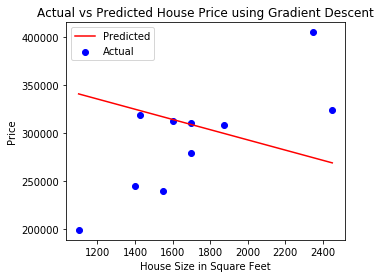


 *************Gradient Descent************
Last Iteration: 700 |  SSE: 0.1663
Gradient for a: 0.577 | Gradient for b: -0.134
Updated a: 3.133 | Updated b: 0.509

            Max Iterations = 700 :
******************************************


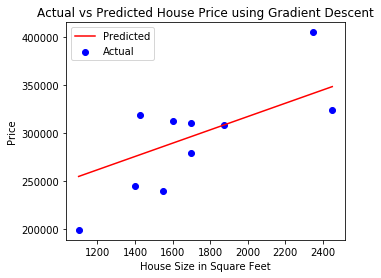


 *************Gradient Descent************
Last Iteration: 1469 |  SSE: 0.0001
Gradient for a: 0.014 | Gradient for b: -0.003
Updated a: 1.97 | Updated b: 0.779

            Max Iterations = 2000 :
******************************************


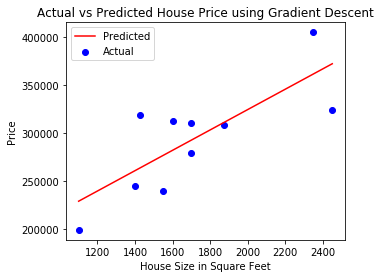

In [4]:
#%%timeit

#Implement gradient descent algorithm on prediction of the form Ypred = a + bX
#X is Std_House_Size, Y is Std_House_Price, Ypred is price prediction

def YPred(a, b, X):
    yhat=a+b*X
    return yhat #returns pd.series when X is a series

def SSError(Y, Ypred):
    errors=(Y-Ypred)            #calc error
    sse=0.5*(errors.sum())**2   #calc sse
    return sse                  #returns sse series

#Error gradients w.r.t. weights a & b
#a:  ∂SSE/∂a = (Y-Ypred)     #(-) minus will reflect in update rule
#b:  ∂SSE/∂b = X* (Y-Ypred)  #(-) minus will reflect in update rule

def getTotGradi(X, Y, YPred):  #get gradient at YPred
    aGradi=-(Y-YPred)     #Gradient of a, used to update a value each iteration
    bGradi=-X*(Y-YPred)   #Gradient of b, used to update a value each iteration
    aGradi=aGradi.sum()
    bGradi=bGradi.sum()    
    return aGradi, bGradi

#Update Rules:
#a: a - r * ∂SSE/∂a = a - r * (Y - Ypred)
#b: b - r* ∂SSE/∂b = a - r * X*(Y - Ypred)

def GradientDesc(a, b, YPred, learn_rate, sse_thresh, max_iters):
    iter=1
    sse=10000
    #print('Starting iter, max_iter, a, b:',iter, max_iter, a,b,'\n')
    while (iter < max_iters and sse > sse_thresh):
        data['Y_pred']=YPred(a, b, data['Std_House_Size'])
        sse=SSError(data['Std_House_Price'], data['Y_pred'])
        aGradi, bGradi=getTotGradi(data['Std_House_Size'], data['Std_House_Price'], data['Y_pred'])
        a=a-learn_rate*aGradi        #Update equation for a
        b=b-learn_rate*bGradi        #Update equation for b
        iter+=1
    print('\n','*************Gradient Descent************')    
    print('Last Iteration:',iter,'| ', 'SSE:', round(sse,4))
    print('Gradient for a:', round(aGradi,3),'|', 'Gradient for b:', round(bGradi,3))
    print('Updated a:', round(a,3),'|', 'Updated b:',round(b,3))
    return a, b

#Predict house price using a and b
sigma=data['stdev'].iloc[0]  #House price was the last standard deviation calculated
print('###  Standard Deviation House Price - ', sigma,' ###')

def get_price_pred(a,b,sigma,Std_House_Size):
    std_price=(a+b*Std_House_Size)
    price=std_price*sigma
    return price

#Illustration of SGD stopped at

for value in [100, 400, 700, 2000]:
    a_val=50
    b_val=50
    a,b=GradientDesc(a_val, b_val, YPred, learn_rate=0.01, sse_thresh=0.0001, max_iters=value)
    house_price_pred=get_price_pred(a, b, sigma, data['Std_House_Size'])
    print('\n','           Max Iterations =',value,':')
    print('******************************************')
    plt.figure(figsize=(5,4))
    plt.scatter(data['House_Size'], data['House_Price'],color='blue')
    plt.plot(data['House_Size'], house_price_pred,color='red')
    plt.title('Actual vs Predicted House Price using Gradient Descent')
    plt.xlabel('House Size in Square Feet')
    plt.ylabel('Price')
    plt.legend(['Predicted','Actual'],loc=2)
    plt.show()

In [5]:
yint=[]
slope=[]

def GradientDesc2(a, b, YPred, learn_rate, sse_thresh, max_iters):
    iter=1
    sse=10000
    print('Random initialization values:','a =', a,'|','b =',b,'\n')
    print('***  Every hundred iterations shown plus the last iteration:  ***')
    while (iter < max_iters and sse > sse_thresh):
        data['Y_pred']=YPred(a, b, data['Std_House_Size'])
        sse=SSError(data['Std_House_Price'], data['Y_pred'])
        aGradi, bGradi=getTotGradi(data['Std_House_Size'], data['Std_House_Price'], data['Y_pred'])
        a=a-learn_rate*aGradi        #Update a.
        b=b-learn_rate*bGradi        #Update b.
        
        #Capture a and b for 3D Plot
        yint.append(a)
        slope.append(b)
        
        #Print Details
        if iter==0 or iter%100==0 or sse<=sse_thresh:
            print('Iter:',iter,'|', 'SSE:', round(sse,4),'Gradient a:', round(aGradi,3),'|', 'Gradient b:',\
                  round(bGradi,3),'Updated a:', round(a,3),'|', 'Updated b:',round(b,3))
        iter+=1
    return a, b

#Just Gradient Descent with Iterations
#Initializing with a=77 and b=77 gets Gradient Descent stuck in local minimum where SSE = 0.
a_val=10
b_val=10
a,b=GradientDesc2(a_val, b_val, YPred, learn_rate=0.01, sse_thresh=0.0001, max_iters=2000)

Random initialization values: a = 10 | b = 10 

***  Every hundred iterations shown plus the last iteration:  ***
Iter: 100 | SSE: 1.4067 Gradient a: 1.677 | Gradient b: -0.391 Updated a: 5.409 | Updated b: -0.019
Iter: 200 | SSE: 0.5362 Gradient a: 1.036 | Gradient b: -0.24 Updated a: 4.082 | Updated b: 0.289
Iter: 300 | SSE: 0.2043 Gradient a: 0.639 | Gradient b: -0.148 Updated a: 3.262 | Updated b: 0.479
Iter: 400 | SSE: 0.0778 Gradient a: 0.394 | Gradient b: -0.091 Updated a: 2.756 | Updated b: 0.596
Iter: 500 | SSE: 0.0296 Gradient a: 0.243 | Gradient b: -0.056 Updated a: 2.444 | Updated b: 0.669
Iter: 600 | SSE: 0.0113 Gradient a: 0.15 | Gradient b: -0.035 Updated a: 2.252 | Updated b: 0.713
Iter: 700 | SSE: 0.0043 Gradient a: 0.093 | Gradient b: -0.022 Updated a: 2.133 | Updated b: 0.741
Iter: 800 | SSE: 0.0016 Gradient a: 0.057 | Gradient b: -0.013 Updated a: 2.059 | Updated b: 0.758
Iter: 900 | SSE: 0.0006 Gradient a: 0.035 | Gradient b: -0.008 Updated a: 2.014 | Updated b: 0.

In [6]:
#predicted_std_price = (a + b*X)
#Multiply by sigma to get prediction as regular dollars:  predicted_price = (predicted_std_price * sigma)
#The function, get_pred_price, scales the predicted_std_price by sigma.

In [7]:
print(len(yint),len(slope))
print(min(yint),min(slope))
print(max(yint),max(slope))

1090 1090
1.9700590433748022 -9.658433152264326
9.351441783304931 7.448818696783114


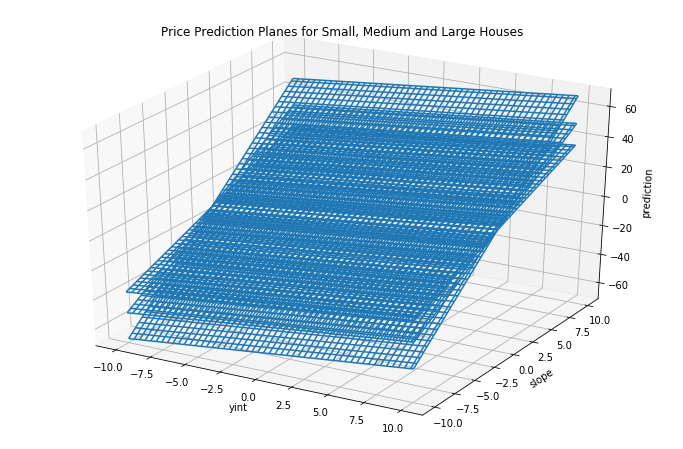

In [8]:
#3D Plot of Gradient Descent in action:  prediction(y-int, slope)
fig, ax1=plt.subplots(figsize=(12,8),subplot_kw={'projection': '3d'})
alpha=10
r=np.linspace(-alpha, alpha, 100)
yint, slope=np.meshgrid(r,r)
prediction=yint + slope*2.63   #Fix Min Std_House_Size = 2.63
prediction2=yint + slope*4.06  #Fix Medium Std_House_Size = 4.06
prediction3=yint + slope*5.86  #Fix Max Std_House_Size = 5.86
ax1.set_xlabel('yint')
ax1.set_ylabel('slope')
ax1.set_zlabel('prediction')
ax1.set_title('Price Prediction Planes for Small, Medium and Large Houses')
ax1.plot_wireframe(yint, slope ,prediction)
ax1.plot_wireframe(yint, slope ,prediction2)
ax1.plot_wireframe(yint, slope ,prediction3)
plt.show()

In [9]:
#Convert house prices from standardized to.0 regular dollars
regular_dollars=get_price_pred(a, b, sigma, data['Std_House_Size'])
regular_dollars_df=regular_dollars.to_frame(name='Predicted_Price')
regular_dollars_df

,Predicted_Price
0,228919.497566
1,260753.920044
2,263406.788584
3,276671.131284
4,281976.868363
5,292588.342523
6,292588.342523
7,311158.422302
8,361562.924560
9,372174.398719


In [10]:
#Summarize results
summary=data[['House_Size','House_Price']].merge(regular_dollars_df, left_index=True, right_index=True)
summary['Price_Difference']=summary['Predicted_Price']-summary['House_Price']
print("Price vs Predicted Price:")
summary.round(2)

Price vs Predicted Price:


,House_Size,House_Price,Predicted_Price,Price_Difference
0,1100.0,199000.0,228919.50,29919.50
1,1400.0,245000.0,260753.92,15753.92
2,1425.0,319000.0,263406.79,-55593.21
3,1550.0,240000.0,276671.13,36671.13
4,1600.0,312000.0,281976.87,-30023.13
5,1700.0,279000.0,292588.34,13588.34
6,1700.0,310000.0,292588.34,-17411.66
7,1875.0,308000.0,311158.42,3158.42
8,2350.0,405000.0,361562.92,-43437.08
9,2450.0,324000.0,372174.40,48174.40
